# EDA: Salmonella Enterica Pathogen Detection

## **Objective:**  
## Load, clean, explore, and visualize clinical metadata to understand patterns in pathogen detection.

### https://www.kaggle.com/datasets/imtkaggleteam/pathogen-detection-salmonella-enterica?resource=download

In [15]:
# 🚀 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os 
#!pip install scikit-learn

In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/pathogen_detection_salmonella_enterica.csv')
print(f"Raw data: {df.shape[0]} rows, {df.shape[1]} columns")

# Quick look
df.head()

Raw data: 558819 rows, 16 columns


,#Organism group,Strain,Isolate identifiers,Serovar,Isolate,Create date,Location,Isolation source,Isolation type,SNP cluster,Min-same,Min-diff,BioSample,Assembly,AMR genotypes,Computed types
0,Salmonella enterica,SQ0227,"""93-6175B"",""SQ0227"",""SRS426868""",enteritidis,PDT000000002.3,2014-01-04T17:03:07Z,USA: Western Region,Ocean,environmental/other,PDS000032687.2,0.0,NaN,SAMN02147118,NaN,"ant(2'')-Ia=COMPLETE,aph(3')-Ia=COMPLETE,blaTE...","antigen_formula=9:g,m:-,serotype=Enteritidis"
1,Salmonella enterica,SQ0228,"""93-2836A"",""SQ0228"",""SRS426867""",enteritidis,PDT000000003.3,2014-01-04T17:03:07Z,USA: Western Region,Ocean,environmental/other,PDS000032687.2,0.0,NaN,SAMN02147119,NaN,"mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=9:g,m:-,serotype=Enteritidis"
2,Salmonella enterica,SQ0229,"""93-7741"",""SQ0229"",""SRS426869""",enteritidis,PDT000000004.3,2014-01-04T17:03:07Z,USA: Western Region,Ocean,environmental/other,PDS000065776.23,0.0,25.0,SAMN02147120,NaN,"mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=9:g,m:-,serotype=Enteritidis"
3,Salmonella enterica,Gen_001782,"""Gen_001782"",""SRS426891""",Heidelberg,PDT000000005.4,2014-01-04T17:03:07Z,USA,food,environmental/other,PDS000150683.10,2.0,2.0,SAMN02147121,GCA_010121905.1,"fosA7=COMPLETE,mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=4:r:1,2,serotype=Heidelberg"
4,Salmonella enterica,Gen_001783,"""Gen_001783"",""SRS426892""",Heidelberg,PDT000000006.4,2014-01-04T17:03:07Z,USA,food,environmental/other,PDS000150683.10,2.0,17.0,SAMN02147122,GCA_010121865.1,"blaCMY-2=COMPLETE,fosA7=COMPLETE,mdsA=COMPLETE...","antigen_formula=4:r:1,2,serotype=Heidelberg"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558819 entries, 0 to 558818
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   #Organism group      558819 non-null  object 
 1   Strain               521387 non-null  object 
 2   Isolate identifiers  558784 non-null  object 
 3   Serovar              271461 non-null  object 
 4   Isolate              558819 non-null  object 
 5   Create date          558819 non-null  object 
 6   Location             493788 non-null  object 
 7   Isolation source     266854 non-null  object 
 8   Isolation type       519107 non-null  object 
 9   SNP cluster          503772 non-null  object 
 10  Min-same             465867 non-null  float64
 11  Min-diff             373323 non-null  float64
 12  BioSample            558813 non-null  object 
 13  Assembly             468778 non-null  object 
 14  AMR genotypes        543238 non-null  object 
 15  Computed types   

In [4]:
# Check for missing values
missing = df.isna().mean().sort_values(ascending=False)
print(missing[missing > 0])



Isolation source       0.522468
Serovar                0.514224
Min-diff               0.331943
Min-same               0.166337
Assembly               0.161127
Location               0.116372
SNP cluster            0.098506
Isolation type         0.071064
Strain                 0.066984
AMR genotypes          0.027882
Computed types         0.002061
Isolate identifiers    0.000063
BioSample              0.000011
dtype: float64


In [5]:
# Drop columns with >50% missing data
df.drop(columns=['Isolation source', 'Serovar'], inplace=True)

# Drop rows with missing critical columns (>30% but relevant)
df.dropna(subset=['Min-diff'], inplace=True)

# Fill less important missing values
df['Min-same'] = df['Min-same'].fillna(df['Min-same'].median())
df['Assembly'] = df['Assembly'].fillna('Unknown')
df['Location'] = df['Location'].fillna('Unknown')
df['SNP cluster'] = df['SNP cluster'].fillna('NA')
df['Isolation type'] = df['Isolation type'].fillna('NA')
df['Strain'] = df['Strain'].fillna('Unknown')
df['AMR genotypes'] = df['AMR genotypes'].fillna('None')
df['Computed types'] = df['Computed types'].fillna('Unknown')


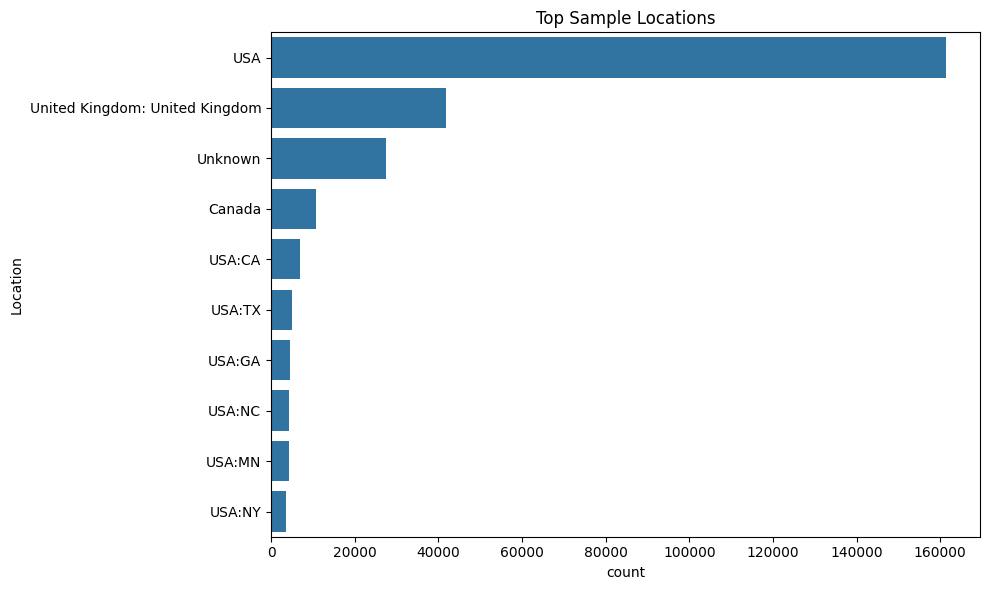

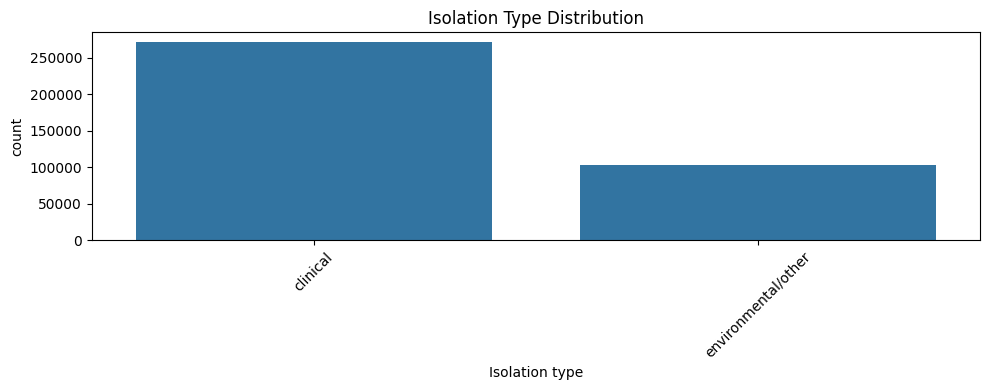

In [6]:
# Location distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Location', order=df['Location'].value_counts().index[:10])
plt.title('Top Sample Locations')
plt.tight_layout()
plt.show()

# Isolation type distribution
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Isolation type', order=df['Isolation type'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Isolation Type Distribution')
plt.tight_layout()
plt.show()


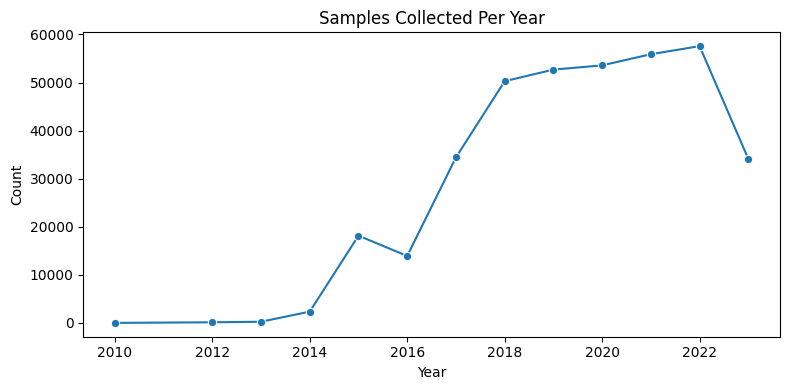

In [7]:
# Ensure date column exists
if 'Create date' in df.columns:
    df['Create date'] = pd.to_datetime(df['Create date'], errors='coerce')
    df['year'] = df['Create date'].dt.year

    # Drop null years
    df = df.dropna(subset=['year'])

    yearly = df['year'].value_counts().sort_index()

    plt.figure(figsize=(8,4))
    sns.lineplot(x=yearly.index, y=yearly.values, marker="o")
    plt.title('Samples Collected Per Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [13]:


# Drop non-informative or problematic columns
drop_cols = ['Isolate identifiers', 'BioSample', 'Assembly', 'Create date']
df_ml = df.drop(columns=drop_cols, errors='ignore')

# Encode all categorical features
for col in df_ml.select_dtypes(include=['object']).columns:
    df_ml[col] = df_ml[col].astype(str)
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])

# Ensure datetime columns are dropped (you already extracted 'year', which is OK)
X = df_ml.drop(columns=['AMR genotypes'])  # target column
y = df_ml['AMR genotypes']

# Encode target
y = LabelEncoder().fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale only numeric features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)



In [16]:

os.makedirs('../data/processed/', exist_ok=True)
df_ml.to_csv('../data/processed/salmonella_cleaned.csv', index=False)
